In [ ]:
!pip install fastai

In [ ]:
!pip install kornia

     |████████████████████████████████| 367 kB 5.2 MB/s 


In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.1 MB/s 


In [ ]:
#Load the dependancies
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
import pydicom
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['image.cmap'] = 'bone'
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fpath='/content/drive/MyDrive/halathon/problem statement 2'
path = Path(fpath)
train_imgs = path

In [ ]:
#get dicom files
items = get_dicom_files(train_imgs, recurse=True)
print(len(items))
#now lets read a file:
img = items[0]
dimg = pydicom.dcmread(img)
print(dimg)

1
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Multi-frame Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113663.1500.1.444852356.3.5.20210120.123200.898
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.46.670589.14.10000.202
(0002, 0013) Implementation Version Name         SH: 'EPIQ-AFFIN_2.02'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'CARDIOLOGY']
(0008, 0012) Instance Creation Date              DA: '20210120'
(0008, 0013) Instance Creation Time              TM: '123200'
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID            

In [ ]:
dimg


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Multi-frame Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113663.1500.1.444852356.3.5.20210120.123200.898
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.46.670589.14.10000.202
(0002, 0013) Implementation Version Name         SH: 'EPIQ-AFFIN_2.02'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'CARDIOLOGY']
(0008, 0012) Instance Creation Date              DA: '20210120'
(0008, 0013) Instance Creation Time              TM: '123200'
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID              

In [ ]:
dimg.PixelData[:200]

b"\xfe\xff\x00\xe0\xd4\x01\x00\x00\x00\x00\x00\x00\x0c$\x01\x00(I\x02\x00\xf2m\x03\x00\xbe\x95\x04\x00\xc6\xbe\x05\x00L\xe8\x06\x00\xc4\x12\x08\x00(>\t\x00|k\n\x00Z\x98\x0b\x00\x0e\xc6\x0c\x00\xa4\xf2\r\x00\x16 \x0f\x00\xc4N\x10\x00\x90}\x11\x00\x16\xad\x12\x00\x10\xdc\x13\x00\xda\n\x15\x00`9\x16\x00Bh\x17\x004\x96\x18\x00\xfc\xc3\x19\x00F\xf2\x1a\x00\xc4\x1f\x1c\x00\xf0K\x1d\x00\x88w\x1e\x00\x82\xa1\x1f\x00\x98\xca \x006\xf4!\x00\xe6\x1c#\x00\x18G$\x00\xcap%\x00^\x9a&\x00\xde\xc4'\x00\xc8\xee(\x00\xc6\x16*\x00TA+\x00\x9aj,\x00R\x94-\x00\xa0\xbd.\x00\x18\xe8/\x00D\x121\x00F<2\x00Ve3\x00x\x8f4\x00\xe0\xba5\x00d\xe56\x00"

In [ ]:
dimg.pixel_array, dimg.pixel_array.shape

(array([[[[  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128],
          ...,
          [  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128]],
 
         [[  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128],
          ...,
          [  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128]],
 
         [[  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128],
          ...,
          [  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128]],
 
         ...,
 
         [[  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128],
          ...,
          [  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128]],
 
         [[  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128],
          ...,
          [  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128]],
 
         [[  0, 128, 128],
          [  0, 128, 128],
          [  0, 128, 128],
   

[Path('/content/drive/MyDrive/halathon/problem statement 2/IM_0003.dcm')]
117 frames per file


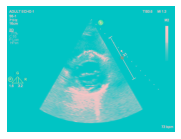

In [ ]:
csource = Path(path)
citems = get_dicom_files(csource)
print(citems)
patient2 = pydicom.dcmread(citems[0])
patient2.show()

In [ ]:
#updating to handle multiple frames
@patch
@delegates(show_image, show_images)
def show(self:DcmDataset, frames=1, scale=True, cmap=plt.cm.bone, min_px=-1100, max_px=None, **kwargs):
    px = (self.windowed(*scale) if isinstance(scale,tuple)
          else self.hist_scaled(min_px=min_px,max_px=max_px,brks=scale) if isinstance(scale,(ndarray,Tensor))
          else self.hist_scaled(min_px=min_px,max_px=max_px) if scale
          else self.scaled_px)
    if px.ndim > 2: 
        gh=[]
        p = px.shape; print(f'{p[0]} frames per file')
        for i in range(frames): u = px[i]; gh.append(u)
        show_images(gh, **kwargs)    
    else: 
        print('1 frame per file')
        show_image(px, **kwargs)

117 frames per file


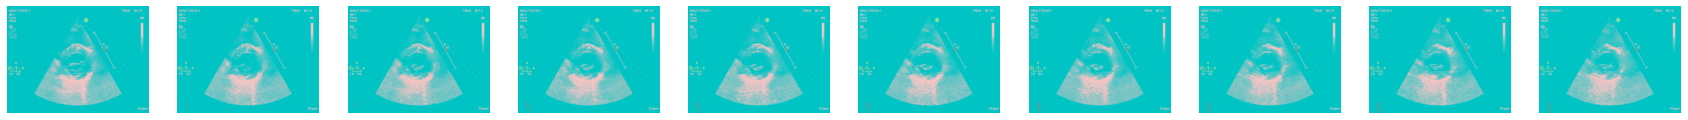

In [ ]:
tsource = Path(path)
titems = get_dicom_files(tsource)
patient3 = pydicom.dcmread(titems[0])
patient3.show(10)

In [ ]:
#lets convert the pixel_array into a tensor.  Fastai can #conveniently do this for us
tensor_dicom = patient2.pixels#convert into tensor
print(f'\nMax pixel: '
      f'{tensor_dicom.max()}\nMin pixel: {tensor_dicom.min()}\nShape: {tensor_dicom.shape}')


Max pixel: 255.0
Min pixel: 0.0
Shape: torch.Size([117, 600, 800, 3])


(array([4.3358607e+07, 2.6910480e+06, 2.9560420e+06, 3.0346290e+06,
        2.7956530e+06, 1.1238272e+08, 5.2587700e+05, 1.9187900e+05,
        1.2222400e+05, 4.2132100e+05]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <a list of 10 Patch objects>)

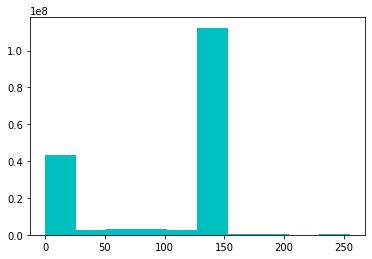

In [ ]:
plt.hist(tensor_dicom.flatten(), color='c')

(array([4.3358607e+07, 2.6910480e+06, 2.9560420e+06, 3.0346290e+06,
        2.7956530e+06, 1.1238272e+08, 5.2587700e+05, 1.9187900e+05,
        1.2222400e+05, 4.2132100e+05]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <a list of 10 Patch objects>)

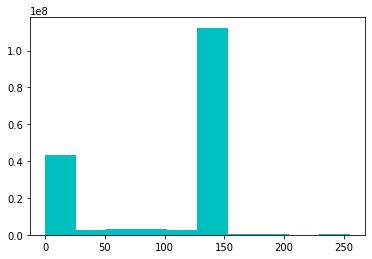

In [ ]:
#convert into tensor taking RescaleIntercept and RescaleSlope into #consideration
tensor_dicom_scaled = patient2.scaled_px
plt.hist(tensor_dicom_scaled.flatten(), color='c')


In [ ]:
print(f'Max pixel: {tensor_dicom_scaled.max()}\nMin pixel: {tensor_dicom_scaled.min()}')

Max pixel: 255.0
Min pixel: 0.0


117 frames per file


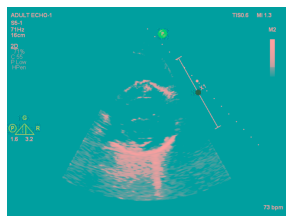

In [ ]:
patient2.show(max_px=500, min_px=80, figsize=(5,5))

117 frames per file


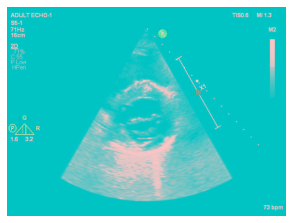

In [ ]:
patient2.show(max_px=250, min_px=-250, figsize=(5,5))

117 frames per file


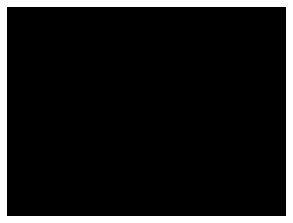

In [ ]:
patient2.show(max_px=-250, min_px=-600, figsize=(5,5))

117 frames per file


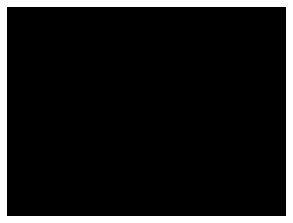

In [ ]:
patient2.show(max_px=-600, min_px=-1000, figsize=(5,5))

117 frames per file


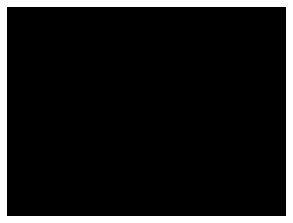

In [ ]:
patient2.show(max_px=-900, min_px=-1024, figsize=(5,5))

117 frames per file


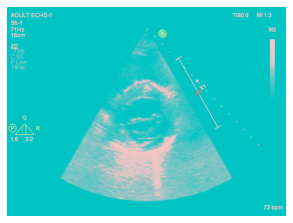

In [ ]:
patient2.show(max_px=None, min_px=-1100, figsize=(5,5))

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <a list of 10 Patch objects>)

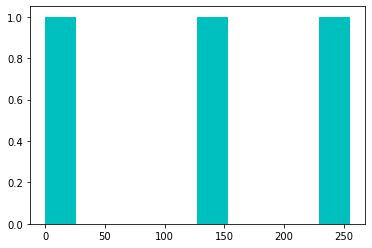

In [ ]:
ten_freq = tensor_dicom_scaled.freqhist_bins(n_bins=1)
fh = patient2.hist_scaled(ten_freq)
plt.hist(ten_freq.flatten(), color='c')
